<a href="https://colab.research.google.com/github/nyamskamau/Moringa-Data-Science-Core/blob/main/Moringa_DataScience_Core_W2_Core_Independent_Project_2020_10_Roselynn_Kamau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Question**

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.
In order to work on the above problem, you need to do the following:
  *   Define the question, the metric for success, the context,experimental design taken and the appropriateness of the available data to answer the given question
  *   Find and deal with outliers, anomalies, and missing data within the dataset.
  *    Perform univariate, bivariate and multivariate analysis recording your observations.
  *  Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
  *  Challenge your solution by providing insights on how you can make improvements.


            
           


# **Data Preparation and Cleaning**

## **Data Preparation**

Importing the Libraries 

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer



Next import the Dataset to be used along with the descriptions of each column , preview the dataset and obtain information on the datatypes of the columns

In [281]:
df = pd.read_csv('Financial Dataset - 1.csv')
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [282]:
definitions = pd.read_csv('VariableDefinitions.csv')
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [283]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [285]:
df.shape

(23524, 13)

## **Data Cleaning**

We carry out a stepwise Data Cleaning Process.

1. **Validity**

We examine the usefullness of the columns at hand in Answering our Research Question.In this analysis we determine that all the columns given are imparative to the study and therefore we proceed to the second step.

2. **Accuracy**

We check for the accuracy of the Data in our Dataset.

In [286]:

df.rename(columns={
                   'Level of Educuation':'Level of Education'
                   },inplace=True)
df['Level of Education'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [287]:
df['Level of Education'].replace({'6':'Other/Dont know/RTA'},inplace = True)

3. **Completeness**

We look for the presence of null values in our Dataset

The dataset had several missing entries and therefore the rows with missing values were dropped and these missing values would affect the output.

In [288]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Education        29
Type of Job               30
dtype: int64

In [289]:
df.dropna(axis=0,inplace=True)

In [290]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Education        0
Type of Job               0
dtype: int64

In [291]:
df.shape

(23343, 13)

4. **Consistency**

We check for the presence of duplicated entries in the dataset

In [292]:
df.duplicated().sum()

0

5. **Uniformity**

We check for the uniformity of the columns in the dataset and whether the datatype of the columns is the correct datatype for us to carry out our study. Currently the data types are adequate although we may require to change some columns into categorical variables down the line in our Analysis.

We also check for anomalies and outliers within the dataset.

In [293]:
df.rename(columns={'The relathip with head':'Relationship',
                   'Level of Educuation':'Level of Education',
                   'gender_of_respondent':'Gender',
                   'marital_status':'Marital_Status',
                   'country':'Country',
                   'Type of Location':'Location'},inplace=True)

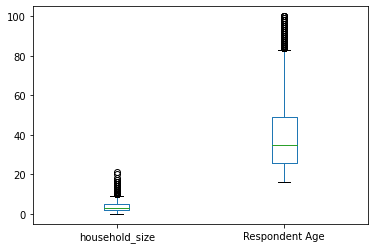

In [294]:
df[['household_size','Respondent Age']].plot(kind='box')
plt.show()

# **Exploratory Data Analysis.**


## **1. Univariate Analysis**




### a.Numerical Variables

#### i. Age Variable

 We first analyse the Age Variable

In [295]:
df['Respondent Age'].describe()

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

In [296]:
df['Respondent Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64

In [297]:
a=df['Respondent Age'].max()
b=df['Respondent Age'].min()
range = a-b
range

84.0

In [298]:
Q1 = df[['Respondent Age']].quantile(0.25)
Q3 = df[['Respondent Age']].quantile(0.75)
IQR = Q3 - Q1
((df[['Respondent Age']]<(Q1 - 1.5*IQR))|(df[['Respondent Age']]>(Q3 + 1.5 *IQR))).value_counts()

Respondent Age
False             23104
True                239
dtype: int64

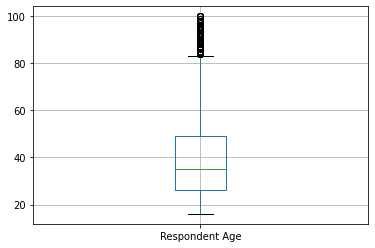

In [299]:
df.boxplot('Respondent Age')

This distribution has skew 0.840661747532081
This distribution has kurtosis 0.09844652254807196


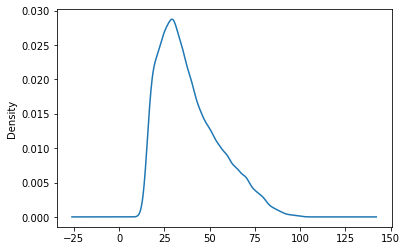

In [300]:
df['Respondent Age'].plot(kind='density')
print('This distribution has skew', df['Respondent Age'].skew())
print('This distribution has kurtosis', df['Respondent Age'].kurt())

The variable has a longer right tail ,with a skew value of 0.8 it is moderately skewed.
It is skewed right,with most of the distribution being on the left.

It is Playtkurtic with a Kurtosis value of 0.098.




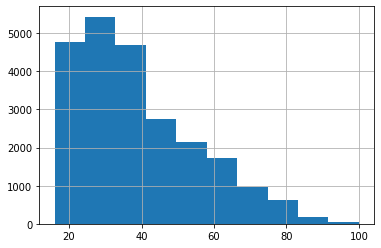

In [301]:
df['Respondent Age'].hist()

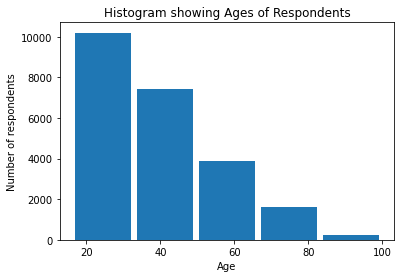

In [302]:
df1 =df['Respondent Age']
plt.hist(df1, bins=5, histtype='bar', rwidth=0.9)

plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Histogram showing Ages of Respondents') 
plt.show()

We remove the Outliers from the column using the upper and lower Quantiles.

In [303]:
df = df[~((df[['Respondent Age']]<(Q1 - 1.5*IQR))|(df[['Respondent Age']]>(Q3 + 1.5 *IQR))).any(axis=1)]

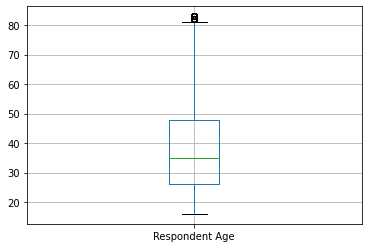

In [304]:
df.boxplot('Respondent Age')

#### ii. Household Size

Next we looked at the household size

In [305]:
df['household_size'].describe()

count    23104.000000
mean         3.702779
std          2.283010
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [306]:
df['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [307]:
a=df['household_size'].max()
b=df['household_size'].min()
range = a-b
range

21.0

In [308]:
Q1 = df[['household_size']].quantile(0.25)
Q3 = df[['household_size']].quantile(0.75)
IQR = Q3 - Q1
((df[['household_size']]<(Q1 - 1.5*IQR))|(df[['household_size']]>(Q3 + 1.5 *IQR))).value_counts()

household_size
False             22728
True                376
dtype: int64

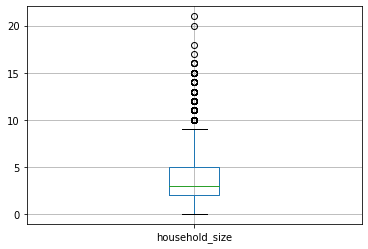

In [309]:
df.boxplot('household_size')

This distribution has skew 0.9702535061302754
This distribution has kurtosis 1.1464700489043174


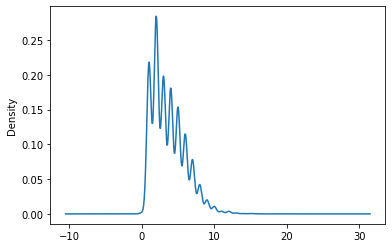

In [310]:
df['household_size'].plot(kind='density')
print('This distribution has skew', df['household_size'].skew())
print('This distribution has kurtosis', df['household_size'].kurt())

The variable has a longer right tail ,with a skew value of 0.97 it is moderately skewed.
It is skewed right,with most of the distribution being on the left.

It is Platykurtic with a Kurtosis value of 1.14.




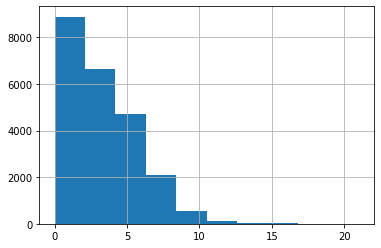

In [311]:
df['household_size'].hist()

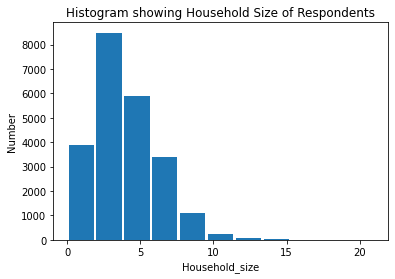

In [312]:
df1 =df['household_size']
plt.hist(df1, bins=11, histtype='bar', rwidth=0.9)

plt.xlabel('Household_size')
plt.ylabel('Number')
plt.title('Histogram showing Household Size of Respondents') 
plt.show()

We use the Quartiles to get rid of the Outliers in the dataset.

In [313]:
df = df[~((df[['household_size']]<(Q1 - 1.5*IQR))|(df[['household_size']]>(Q3 + 1.5 *IQR))).any(axis=1)]

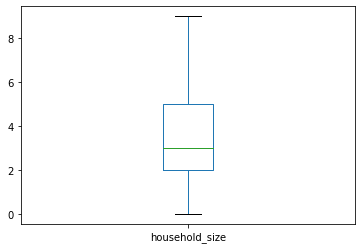

In [314]:
df[['household_size']].plot(kind='box')
plt.show()

### b.**Categotical** Variables

  We then analyze the categorical variables .

#####  i. Gender

In [315]:
df['Gender'].value_counts()

Female    13398
Male       9330
Name: Gender, dtype: int64

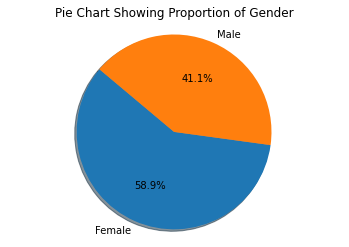

In [316]:
Gender = df['Gender'].count()
Gender
plt.pie(df['Gender'].value_counts() , labels = df.Gender.unique(), autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Gender')
plt.show()

##### ii. Cell Phone Access

Next we look at the Cell phone access variable.


In [317]:
df['Cell Phone Access'].value_counts()

Yes    16988
No      5740
Name: Cell Phone Access, dtype: int64

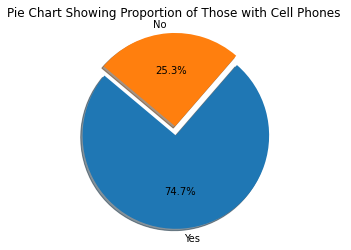

In [318]:
explode = (0 , 0.1)
plt.pie(df['Cell Phone Access'].value_counts() , explode = explode ,labels = df['Cell Phone Access'].unique(), autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Those with Cell Phones ')
plt.show()

#### iii. Bank Account Variable


In [319]:
df['Has a Bank account'].value_counts()

No     19492
Yes     3236
Name: Has a Bank account, dtype: int64

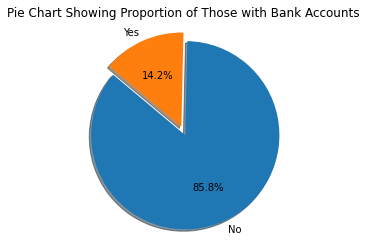

In [320]:
plt.pie(df['Has a Bank account'].value_counts() , explode = explode ,labels = ('No','Yes'), autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Those with Bank Accounts ')
plt.show()

#### iv. Country Variable

We take a look at the Country

In [321]:
df['Country'].value_counts()

Rwanda      8513
Tanzania    6424
Kenya       5870
Uganda      1921
Name: Country, dtype: int64

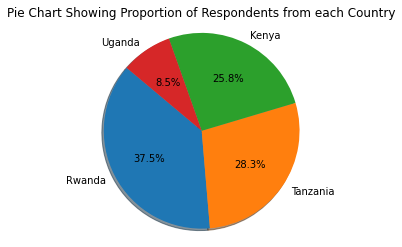

In [322]:
plt.pie(df['Country'].value_counts() ,labels=['Rwanda','Tanzania','Kenya','Uganda'],autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Respondents from each Country')
plt.show()

#### v. Marital Status

Next , the Marital status of the Respondents

In [323]:
df['Marital_Status'].value_counts()

Married/Living together    10433
Single/Never Married        7749
Widowed                     2509
Divorced/Seperated          2029
Dont know                      8
Name: Marital_Status, dtype: int64

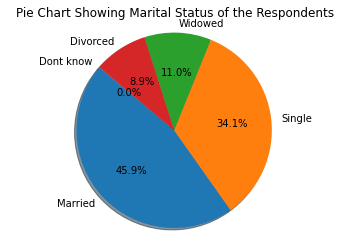

In [324]:
plt.pie(df['Marital_Status'].value_counts() ,labels=['Married','Single','Widowed','Divorced','Dont know'],autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Marital Status of the Respondents')
plt.show()

In [325]:
df['Marital_Status'].replace({'Dont know':'Single/Never Married'},inplace=True)

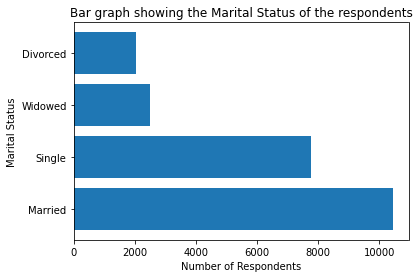

In [326]:
labels=['Married','Single','Widowed','Divorced']
plt.barh(labels , df['Marital_Status'].value_counts())
plt.ylabel("Marital Status")
plt.xlabel("Number of Respondents")
plt.title("Bar graph showing the Marital Status of the respondents")
plt.show()

#### vi. Type of Job Variable

In [327]:
df['Type of Job'].value_counts()

Self employed                   6209
Informally employed             5491
Farming and Fishing             5296
Remittance Dependent            2376
Formally employed Private       1036
Other Income                    1026
No Income                        585
Formally employed Government     382
Government Dependent             209
Dont Know/Refuse to answer       118
Name: Type of Job, dtype: int64

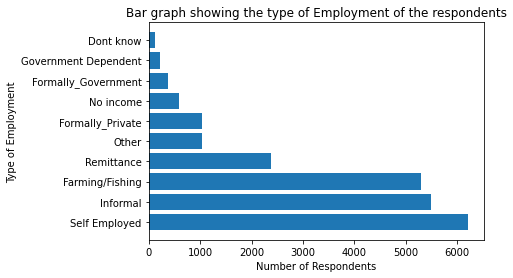

In [328]:
labels=['Self Employed','Informal','Farming/Fishing','Remittance','Other','Formally_Private','No income','Formally_Government','Government Dependent','Dont know']
plt.barh(labels , df['Type of Job'].value_counts())
plt.ylabel("Type of Employment")
plt.xlabel("Number of Respondents")
plt.title("Bar graph showing the type of Employment of the respondents")
plt.show()

#### vii. Level of Education Variable

In [329]:
df['Level of Education'].value_counts()

Primary education                  12444
No formal education                 4232
Secondary education                 4101
Tertiary education                  1135
Vocational/Specialised training      785
Other/Dont know/RTA                   31
Name: Level of Education, dtype: int64

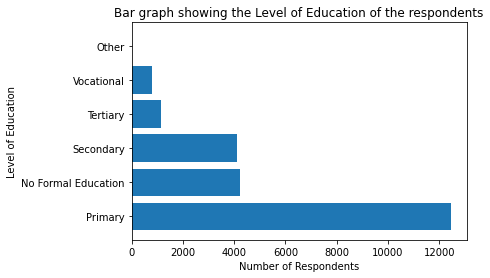

In [330]:
labels=['Primary','No Formal Education','Secondary','Tertiary','Vocational','Other']
plt.barh(labels , df['Level of Education'].value_counts())
plt.ylabel("Level of Education")
plt.xlabel("Number of Respondents")
plt.title("Bar graph showing the Level of Education of the respondents")
plt.show()

#### viii. The Relationship with the Head of the Household Variable

In [331]:
df['Relationship'].value_counts()

Head of Household      12403
Spouse                  6362
Child                   2131
Parent                  1011
Other relative           641
Other non-relatives      180
Name: Relationship, dtype: int64

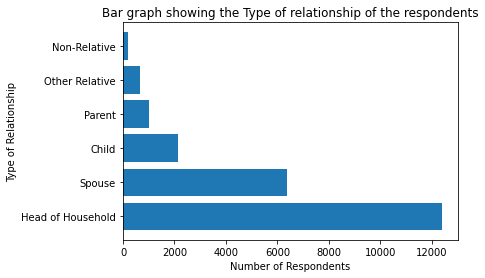

In [332]:
labels=['Head of Household','Spouse','Child','Parent','Other Relative','Non-Relative']
plt.barh(labels , df['Relationship'].value_counts())
plt.ylabel("Type of Relationship")
plt.xlabel("Number of Respondents")
plt.title("Bar graph showing the Type of relationship of the respondents")
plt.show()

#### ix. Location Variable

In [333]:
df['Location'].value_counts()

Rural    13811
Urban     8917
Name: Location, dtype: int64

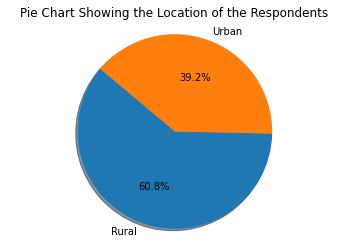

In [334]:
labels = ['Rural','Urban']
plt.pie(df['Location'].value_counts() ,labels=labels,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing the Location of the Respondents')
plt.show()

## **2. Bivariate Analysis**

#### i. Country

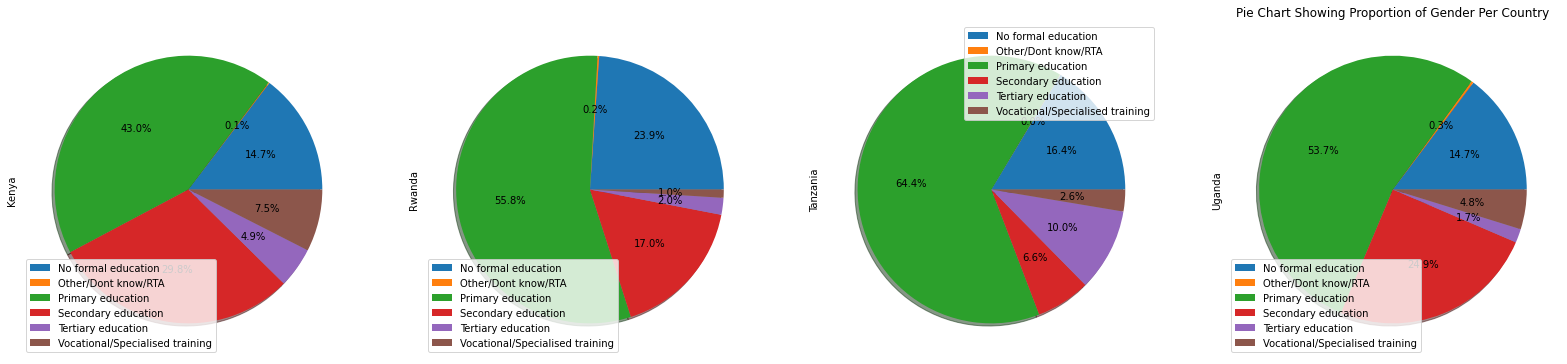

In [335]:
Countries = df.groupby(['Country','Level of Education'])['Level of Education'].count().unstack('Country')
ax = Countries.plot.pie(subplots=True,labeldistance=None,shadow=True, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart Showing Proportion of Gender Per Country')
plt.subplots_adjust( top=4, bottom =2 , right=2.5)
#plt.figlegend()

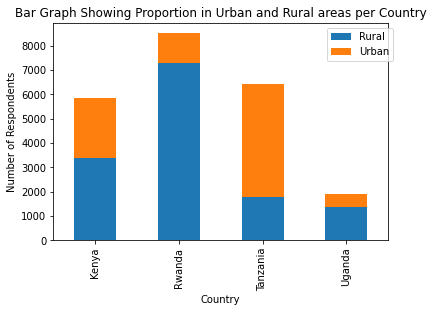

In [336]:
Countries = df.groupby(['Country', 'Location'])['Country'].count().unstack('Location')
ax = Countries.plot.bar(stacked=True, edgecolor='none',)
plt.title('Bar Graph Showing Proportion in Urban and Rural areas per Country')
plt.ylabel('Number of Respondents')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

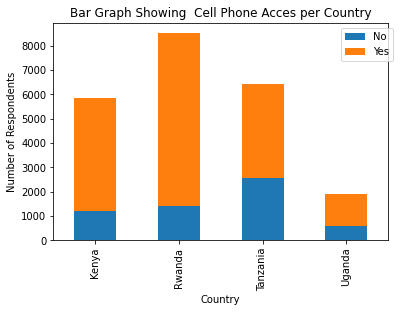

In [337]:
Countries = df.groupby(['Country', 'Cell Phone Access'])['Country'].count().unstack('Cell Phone Access')
ax = Countries.plot.bar(stacked=True, edgecolor='none')
plt.title('Bar Graph Showing  Cell Phone Acces per Country')
plt.ylabel('Number of Respondents')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

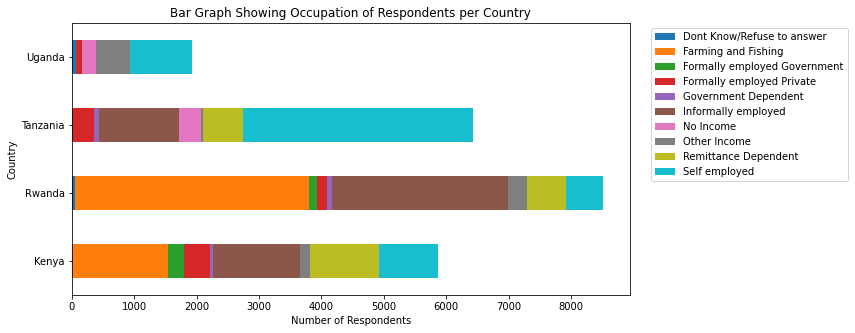

In [338]:
Countries = df.groupby(['Country', 'Type of Job'])['Country'].count().unstack('Type of Job')
ax = Countries.plot.barh(stacked=True, edgecolor='none',figsize=(10,5))
plt.title('Bar Graph Showing Occupation of Respondents per Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

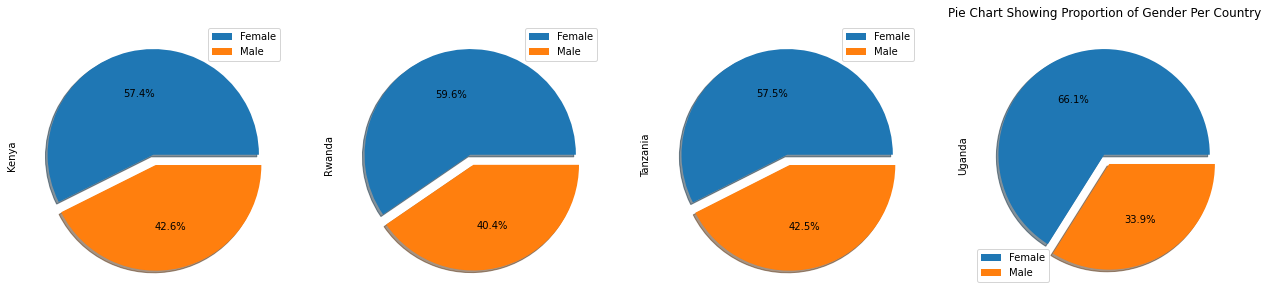

In [339]:
Countries = df.groupby(['Country','Gender'])['Gender'].count().unstack('Country')
explode = (0,0.1)
ax = Countries.plot.pie(subplots=True,labeldistance=None, explode = explode,shadow=True, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart Showing Proportion of Gender Per Country')
plt.subplots_adjust(  top=2, bottom =0.5 , right=2)

#### ii. Cell Phone Access

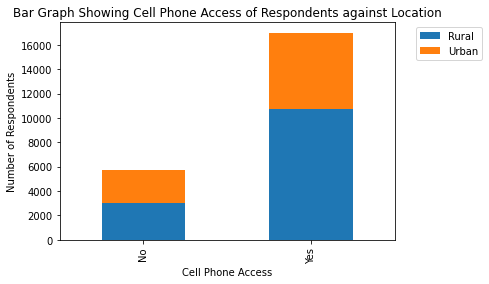

In [340]:
Cell_phone = df.groupby(['Cell Phone Access', 'Location'])['Cell Phone Access'].count().unstack('Location')
ax = Cell_phone.plot.bar(stacked=True, edgecolor='none',)
plt.title('Bar Graph Showing Cell Phone Access of Respondents against Location')
plt.ylabel('Number of Respondents')
horiz_offset = 1.05
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

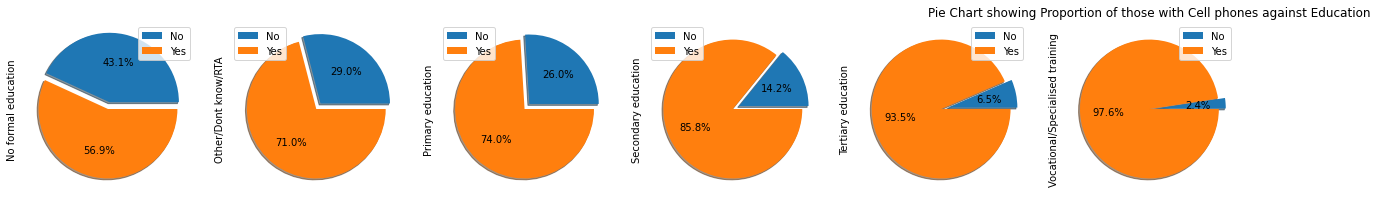

In [341]:
Cell_phone = df.groupby(['Cell Phone Access','Level of Education'])['Cell Phone Access'].count().unstack('Level of Education')
explode =(0.1,0)
ax = Cell_phone.plot.pie(subplots=True,explode = explode ,shadow=True,labeldistance=None, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Proportion of those with Cell phones against Education')
plt.subplots_adjust(top=2, bottom =0.5 , right=2)
plt.show()

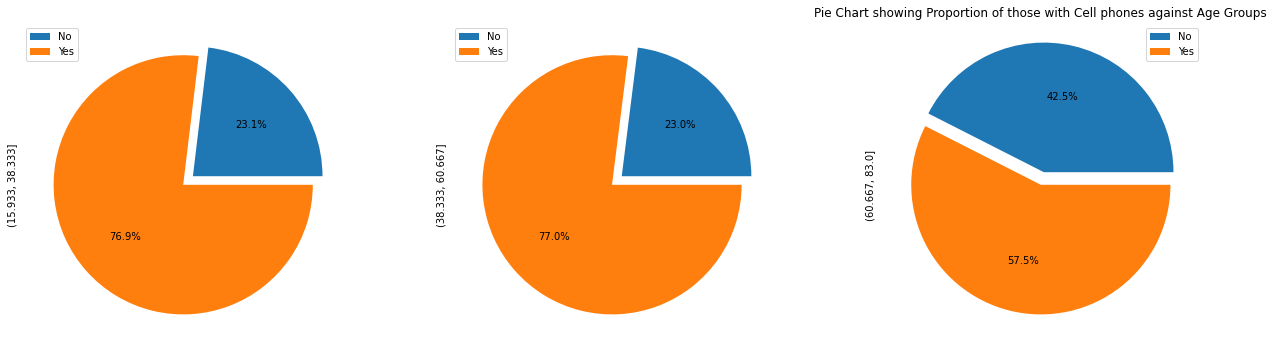

In [342]:
df['Ages'] = pd.cut(x=df['Respondent Age'], bins=3)
Cell_phone = df.groupby(['Cell Phone Access','Ages'])['Cell Phone Access'].count().unstack('Ages')
explode =(0.1,0)
ax = Cell_phone.plot.pie(subplots=True,explode = explode ,labeldistance=None, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Proportion of those with Cell phones against Age Groups')
plt.subplots_adjust(top=2, bottom =0.5 , right=2)
plt.show()

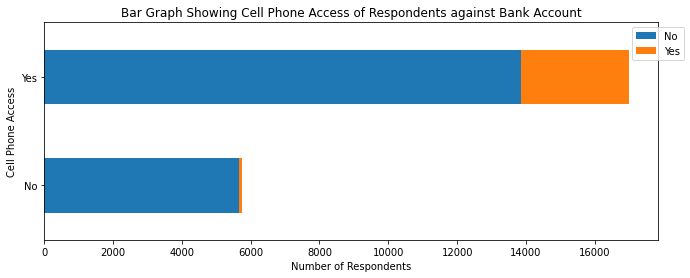

In [343]:
Cell_phone = df.groupby(['Cell Phone Access', 'Has a Bank account'])['Cell Phone Access'].count().unstack('Has a Bank account')
labels=('No Bank Account',"Has Bank Account")
ax = Cell_phone.plot.barh(stacked=True,label=labels, edgecolor='none',figsize=(11,4))
plt.title('Bar Graph Showing Cell Phone Access of Respondents against Bank Account')
plt.ylabel('Cell Phone Access')
plt.xlabel('Number of Respondents')
horiz_offset = 1.05
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

#### iii. Gender

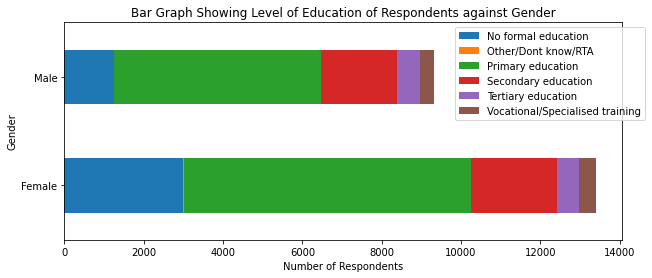

In [344]:
Genders = df.groupby(['Gender', 'Level of Education'])['Gender'].count().unstack('Level of Education')
ax = Genders.plot.barh(stacked=True, edgecolor='none',figsize=(10,4))
plt.title('Bar Graph Showing Level of Education of Respondents against Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Gender')
horiz_offset = 1.05
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

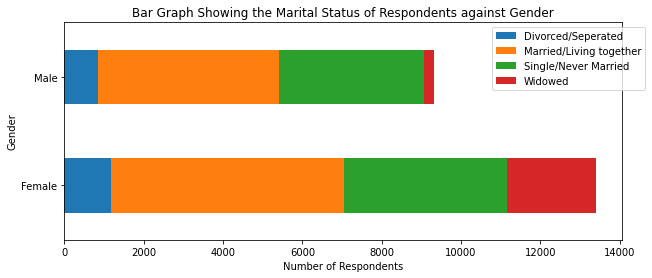

In [345]:
Genders = df.groupby(['Gender', 'Marital_Status'])['Gender'].count().unstack('Marital_Status')
ax = Genders.plot.barh(stacked=True, edgecolor='none',figsize=(10,4))
plt.title('Bar Graph Showing the Marital Status of Respondents against Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Gender')
horiz_offset = 1.05
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

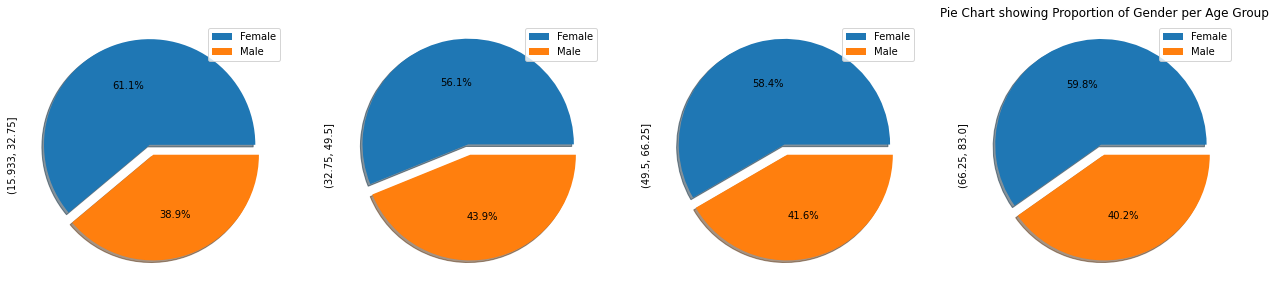

In [346]:
df['Ages'] = pd.cut(x=df['Respondent Age'], bins=4)
Genders = df.groupby(['Gender','Ages'])['Gender'].count().unstack('Ages')
explode =(0.1,0)
ax = Genders.plot.pie(subplots=True,explode = explode ,labeldistance=None,shadow=True, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Proportion of Gender per Age Group')
plt.subplots_adjust( top=2, bottom =0.5 , right=2)
plt.show()

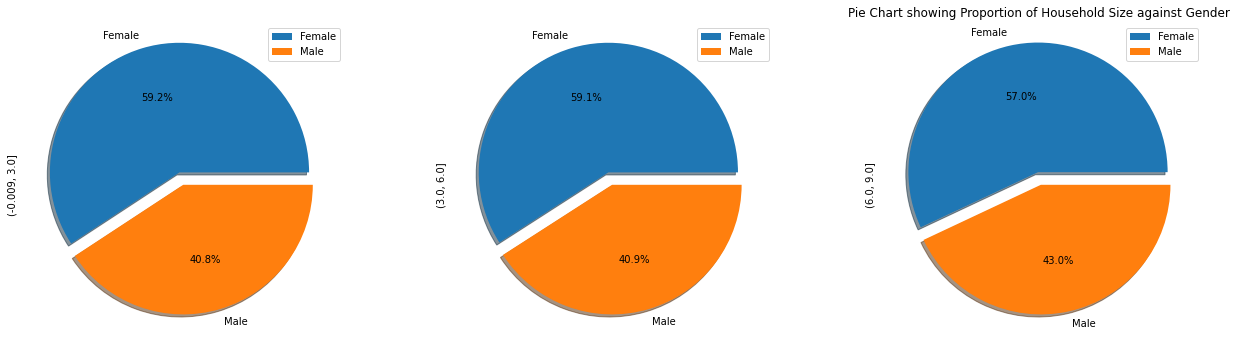

In [347]:
df['Household'] = pd.cut(x=df['household_size'], bins=3)
Genders = df.groupby(['Gender','Household'])['Gender'].count().unstack('Household')
explode =(0.1,0)
ax = Genders.plot.pie(subplots=True,explode = explode ,shadow=True, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Proportion of Household Size against Gender ')
plt.subplots_adjust(top=2, bottom =0.5 , right=2)
plt.show()

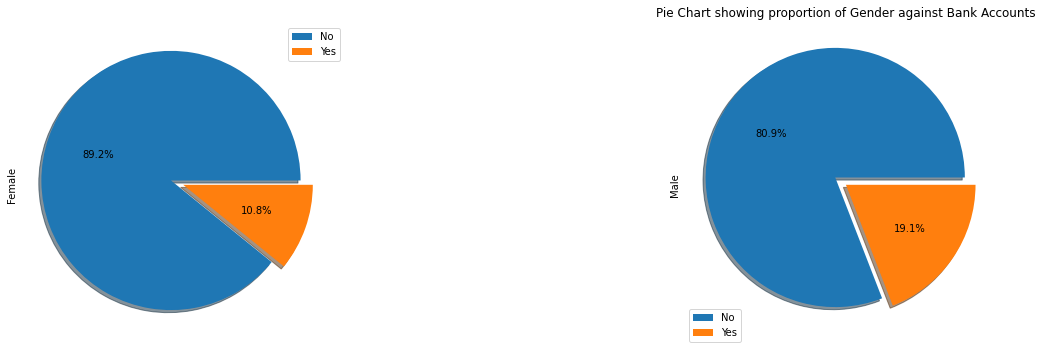

In [348]:
Genders = df.groupby(['Gender','Has a Bank account'])['Has a Bank account'].count().unstack('Gender')
explode =(0.1,0)
ax = Genders.plot.pie(subplots=True,explode = explode ,labeldistance=None,shadow=True, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing proportion of Gender against Bank Accounts')
plt.subplots_adjust(top=2, bottom =0.5 , right=2)
plt.show()

#### iv. Level Of Education.

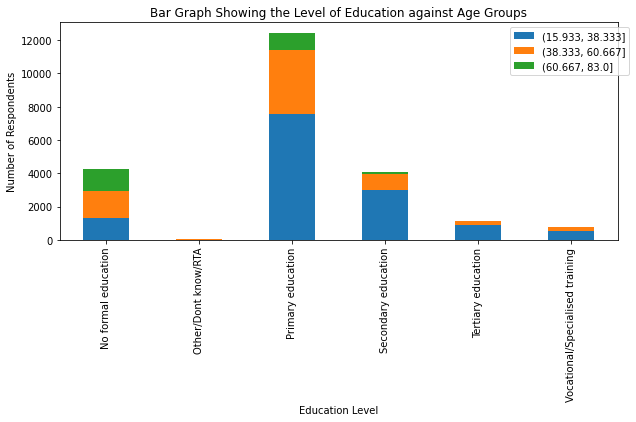

In [349]:
df['Ages'] = pd.cut(x=df['Respondent Age'], bins=3)
Education = df.groupby(['Level of Education','Ages'])['Level of Education'].count().unstack('Ages')
ax = Education.plot.bar(stacked=True, edgecolor='none',figsize=(10,4))
plt.title('Bar Graph Showing the Level of Education against Age Groups')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

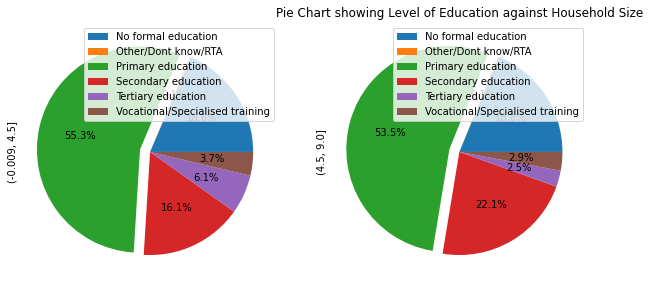

In [350]:
df['Household'] = pd.cut(x=df['household_size'], bins=2)
explode = (0,0,0.1,0,0,0)
Education = df.groupby(['Level of Education','Household'])['Level of Education'].count().unstack('Household')
ax = Education.plot.pie(subplots=True,labeldistance=None,explode=explode, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Level of Education against Household Size')
plt.subplots_adjust(top=2, bottom =0.5 , right=1)
plt.show()

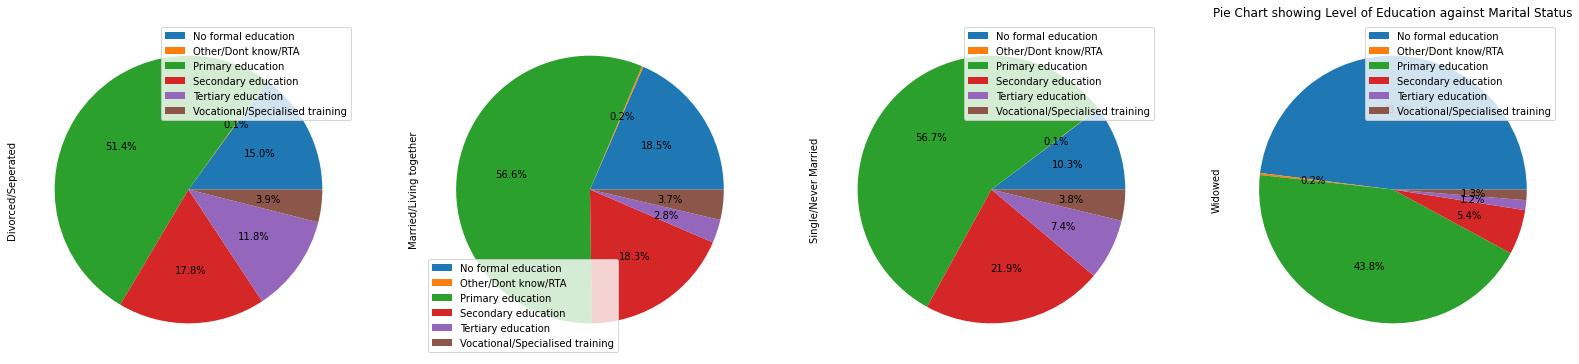

In [351]:
Education = df.groupby(['Level of Education','Marital_Status'])['Level of Education'].count().unstack('Marital_Status')
ax = Education.plot.pie(subplots=True, labeldistance=None, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Level of Education against Marital Status')
plt.subplots_adjust(top=4, bottom =0.25, right=2.5)
plt.show()

#### v.Location

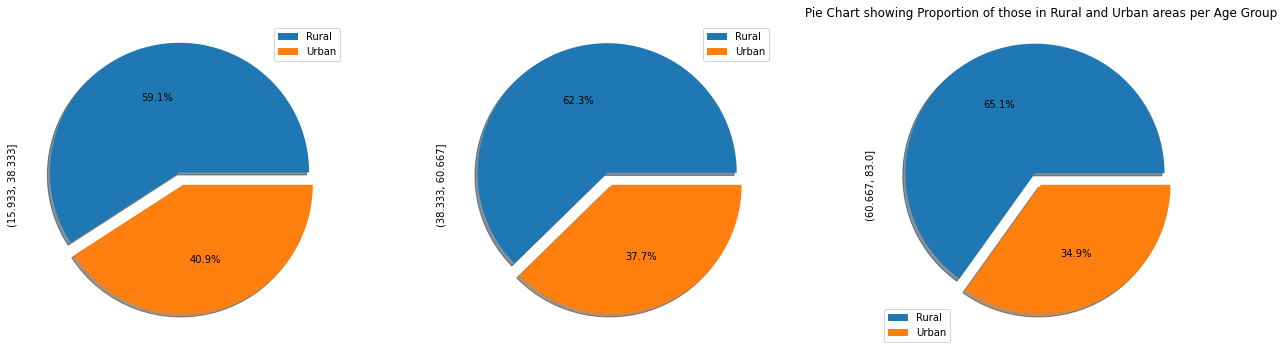

In [352]:
df['Ages'] = pd.cut(x=df['Respondent Age'], bins=3)
location = df.groupby(['Location','Ages'])['Location'].count().unstack('Ages')
explode =(0.1,0)
ax = location.plot.pie(subplots=True,explode = explode ,labeldistance=None,shadow=True, autopct='%1.1f%%',figsize=(9,3))
plt.title('Pie Chart showing Proportion of those in Rural and Urban areas per Age Group')
plt.subplots_adjust( top=2, bottom =0.5 , right=2)
plt.show()

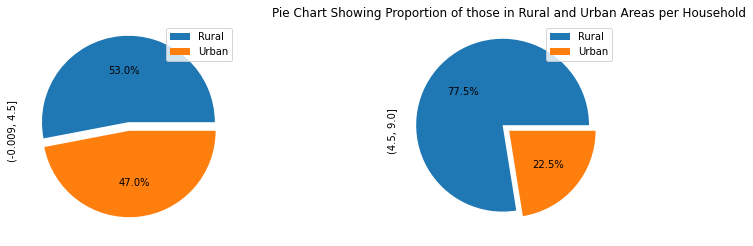

In [353]:
df['Household'] = pd.cut(x=df['household_size'], bins=2)
household = df.groupby(['Location','Household'])['Location'].count().unstack('Household')
explode =(0.1,0)
ax = household.plot.pie(subplots=True,explode=explode,labeldistance=None, autopct='%1.1f%%' ,figsize=(9,3))
plt.title('Pie Chart Showing Proportion of those in Rural and Urban Areas per Household')
plt.subplots_adjust( top=3, bottom =2 , right=1.2)

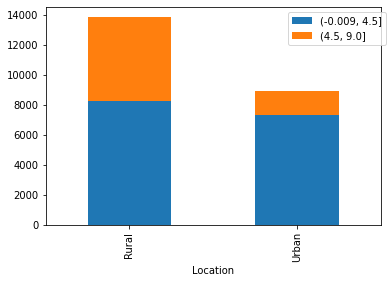

In [354]:
df['Household'] = pd.cut(x=df['household_size'], bins=2)
household = df.groupby(['Location','Household'])['Location'].count().unstack('Household')
ax = household.plot.bar(stacked=True, edgecolor='none',)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

#### vi. Correlation Matrix.

We convert the Object Columns into Categorical Values using Label encoding in order to calculate the correlation matrix

In [355]:
df["Has a Bank account"] = df["Has a Bank account"].astype('category').cat.codes
df["Country"] = df["Country"].astype('category').cat.codes
df["Location"] = df["Location"].astype('category').cat.codes
df["Cell Phone Access"] = df["Cell Phone Access"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["Relationship"] = df["Relationship"].astype('category').cat.codes
df["Level of Education"] = df["Level of Education"].astype('category').cat.codes
df["Type of Job"] = df["Type of Job"].astype('category').cat.codes
df["Marital_Status"] = df["Marital_Status"].astype('category').cat.codes
df.head()

,Country,year,uniqueid,Has a Bank account,Location,Cell Phone Access,household_size,Respondent Age,Gender,Relationship,Marital_Status,Level of Education,Type of Job,Ages,Household
0,0,2018,uniqueid_1,1,0,1,3.0,24.0,0,5,1,3,9,"(15.933, 38.333]","(-0.009, 4.5]"
1,0,2018,uniqueid_2,0,0,0,5.0,70.0,0,1,3,0,4,"(60.667, 83.0]","(4.5, 9.0]"
2,0,2018,uniqueid_3,1,1,1,5.0,26.0,1,3,2,5,9,"(15.933, 38.333]","(4.5, 9.0]"
3,0,2018,uniqueid_4,0,0,1,5.0,34.0,0,1,1,2,3,"(15.933, 38.333]","(4.5, 9.0]"
4,0,2018,uniqueid_5,0,1,0,8.0,26.0,1,0,2,2,5,"(15.933, 38.333]","(4.5, 9.0]"


In [356]:
df.corr()

,Country,year,Has a Bank account,Location,Cell Phone Access,household_size,Respondent Age,Gender,Relationship,Marital_Status,Level of Education,Type of Job
Country,1.000000,-0.103922,-0.163041,0.154342,-0.153084,-0.209427,-0.056795,-0.026284,0.125917,0.051366,-0.054598,0.377666
year,-0.103922,1.000000,0.113051,0.213639,-0.057594,-0.090089,-0.023727,0.002665,-0.000917,-0.023944,0.175114,0.248355
Has a Bank account,-0.163041,0.113051,1.000000,0.090617,0.209892,-0.023707,0.025674,0.116358,-0.071168,-0.055035,0.327922,-0.062808
Location,0.154342,0.213639,0.090617,1.000000,-0.089389,-0.286147,-0.048786,0.013649,0.016934,0.108977,0.129918,0.373338
Cell Phone Access,-0.153084,-0.057594,0.209892,-0.089389,1.000000,0.110052,-0.081494,0.103406,-0.056127,-0.117203,0.247794,-0.142924
household_size,-0.209427,-0.090089,-0.023707,-0.286147,0.110052,1.000000,-0.106259,0.008560,0.088456,-0.192412,-0.019229,-0.214826
Respondent Age,-0.056795,-0.023727,0.025674,-0.048786,-0.081494,-0.106259,1.000000,0.014728,-0.142182,0.215849,-0.337054,-0.112028
Gender,-0.026284,0.002665,0.116358,0.013649,0.103406,0.008560,0.014728,1.000000,-0.476605,-0.119978,0.118866,-0.028215
Relationship,0.125917,-0.000917,-0.071168,0.016934,-0.056127,0.088456,-0.142182,-0.476605,1.000000,-0.197309,-0.021496,0.040189
Marital_Status,0.051366,-0.023944,-0.055035,0.108977,-0.117203,-0.192412,0.215849,-0.119978,-0.197309,1.000000,-0.123376,0.087105


##  **3. Multivariate Analysis.**

### i. Principal Component Analysis.

In [378]:
X = df.drop(['uniqueid','Has a Bank account','Ages','Household'],axis=1)
y = df['Has a Bank account']

In [379]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [380]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [381]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [382]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18327646, 0.15156139, 0.14320607, 0.1015955 , 0.08757211,
       0.07346882, 0.06829619, 0.06073759, 0.05181168, 0.04185947,
       0.03661471])

Most of the Variance is being brought about by the first four variables.

Using either one or even no Principal Component gives the same Accuracy of 85% as seen below.

In [362]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3904    0]
 [ 642    0]]
Accuracy 0.858776946766388


In [369]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3904    0]
 [ 642    0]]
Accuracy 0.858776946766388


In [375]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3904    0]
 [ 642    0]]
Accuracy 0.858776946766388


In [383]:
from sklearn.decomposition import PCA

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3904    0]
 [ 642    0]]
Accuracy 0.858776946766388


### ii. Discriminant Analysis.

In [384]:
X = df.drop(['uniqueid','Has a Bank account','Ages','Household'],axis=1)
y = df['Has a Bank account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[7619  227]
 [ 944  302]]
Accuracy0.8712054553453585


In [385]:
X = df.drop(['year','uniqueid','Has a Bank account','Ages','Household'],axis=1)
y = df['Has a Bank account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[7580  266]
 [ 902  344]]
Accuracy0.87153541575011


The Accuracy of carrying out LDA with one Linear Discriminant lies at 87%

### iii.Factor Analysis

The Factor analysis was carries out in steps 

1. Dropping the irrelevant columns

2. Carry out the  **Bartlett's Sphericity Test**

 Test the hypothesis that the correlation matrix
 is equal to the identity matrix.identity

  ***H0:*** The matrix of population correlations is  equal   to I.

 ***H1:*** The matrix of population correlations is not equal to I.

 If the p-value = 0 , then we conclude that the data is Statistically significant.

3. Calculate the **Kaiser-Meyer-Olkin** value of the model

 Calculate the Kaiser-Meyer-Olkin criterion
 for items and overall. This statistic represents
 the degree to which each observed variable is
 predicted, without error, by the other variables
 in the dataset. 
 
 If KMO of the model is < 0.6 then it is considered
inadequate and one cannot carry out Factor Analysis.



Our Dataset had a p-value of 0.0 and was therefore Statistically significant.

However the KMO value for the model was 0.56724 and therefore the data was inadequate for us to carry out Factor Analysis.

In [386]:
df.drop(['uniqueid','Ages','Household'],axis=1,inplace=True)

In [388]:
#!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(36208.66783936131, 0.0)

In [389]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
kmo_all,kmo_model


(                         KMO
 Country             0.554396
 year                0.524208
 Has a Bank account  0.610042
 Location            0.688728
 Cell Phone Access   0.723210
 household_size      0.692958
 Respondent Age      0.527451
 Gender              0.458837
 Relationship        0.464043
 Marital_Status      0.517784
 Level of Education  0.575368
 Type of Job         0.612468, 0.5688254024488583)

If we drop the columns with the lowest KMO values then the Model KMO becomes adequate enough for us to carry out Factor Analysis.

In [390]:
df.drop(['Respondent Age','Gender','Relationship'],axis=1,inplace=True)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
kmo_all,kmo_model



21665.86495132641 0.0


(                         KMO
 Country             0.559919
 year                0.531819
 Has a Bank account  0.639403
 Location            0.695827
 Cell Phone Access   0.678528
 household_size      0.704583
 Marital_Status      0.645124
 Level of Education  0.610215
 Type of Job         0.609753, 0.6259980112266483)

In [393]:
fa = FactorAnalyzer()
fa.analyze(df, 8, rotation=None)


ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,2.011744
1,1.682009
2,1.044384
3,1.022344
4,0.766105
5,0.712182
6,0.669598
7,0.622826
8,0.468808


In [400]:
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4
Country,0.031628,-0.138954,0.943015,0.127227
year,0.518728,0.098514,-0.113513,0.003894
Has a Bank account,0.066852,0.518212,-0.112492,0.042102
Location,0.458500,0.098005,0.123634,0.359799
Cell Phone Access,-0.143046,0.416637,-0.061257,-0.155798
household_size,-0.171676,-0.022750,-0.143479,-0.517334
Marital_Status,-0.004116,-0.146286,-0.011832,0.377437
Level of Education,0.208992,0.630654,0.036319,-0.079835
Type of Job,0.571740,-0.104055,0.343254,0.165609


In [401]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4
SS Loadings,0.905286,0.911218,1.073724,0.615596
Proportion Var,0.100587,0.101246,0.119303,0.068400
Cumulative Var,0.100587,0.201834,0.321136,0.389536


After carrying out factor analysis with four factors it is obsereved that:

i. Factor 1 has high loadings on Year ,Type of job and location.

ii. Factor 2 has high loading on Bank Account and Level of Education.

iii. Factor 3 has high loadings on Country.

iv. Factor 4 has high loadings on Hosehold Size.  

v. Cumulative Variance caused by the model is 38%.

In [404]:
fa = FactorAnalyzer()
fa.analyze(df, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
Country,0.174645,-0.134906,0.975687
year,0.398955,0.130352,-0.144011
Has a Bank account,0.099547,0.467332,-0.127733
Location,0.627242,0.036636,0.058038
Cell Phone Access,-0.183799,0.425629,-0.056168
household_size,-0.397553,0.086526,-0.120107
Marital_Status,0.175754,-0.221129,0.000640
Level of Education,0.182949,0.669311,0.001517
Type of Job,0.568744,-0.081399,0.263134


In [405]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,1.172668,0.947080,1.079212
Proportion Var,0.130296,0.105231,0.119912
Cumulative Var,0.130296,0.235528,0.355440


After carrying out Factor Analysis with three factors it is observed that:

i.The first factor has high loadings on the Type of Job and location

ii. Factor two has high loadings on Cell Phone Access , Has a bank account and Level of Education.

iii. Factor three has high loadings on Country.

iv. The cumulative variance caused by the model is 35%.

In [396]:
fa = FactorAnalyzer()
fa.analyze(df, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
Country,0.386278,-0.272987
year,0.289706,0.233356
Has a Bank account,0.013743,0.536223
Location,0.589239,0.121765
Cell Phone Access,-0.207476,0.381071
household_size,-0.421903,0.051841
Marital_Status,0.171021,-0.173871
Level of Education,0.128563,0.612223
Type of Job,0.681481,-0.078746


In [397]:
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.311773,0.990491
Proportion Var,0.145753,0.110055
Cumulative Var,0.145753,0.255807


After carrying out Factor Analysis it can be seen that:

i. Factor one has high loadings on Location and the Type of Job .

ii. Factor two has high loadings on Bank Account and the Level of Education.

iii. Cumulatively the Variance explained by the two factors is 25%.

This therefore means that the underlying social-economic factors that influence whether or not a person has a Bank account are :

 i. Whether they reside in Urban or Rural Centres and the job they hold.

 ii. Their Level of Education and whether they already hold a Bank Account.

# Challenging the Solution

## 1.MCA
Although we have carried out Prinicipal Component Analysis on our data , another way to go about it would be to carry out Multiple Correspondence Analysis which is a PCA-like technique for Categorical Data.

In [ ]:
%pip install --user prince
import site
site.main()
import prince
!pip install xgboost
!pip install plotly
%pip install --user mca
import mca
mca = prince.MCA()

In [41]:
df = pd.read_csv('Financial Dataset - 1.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
X = df[['gender_of_respondent', 'Has a Bank account', 'Type of Location', 'Cell Phone Access']]
X.isnull().sum()
X.dropna(axis=0,inplace=True)

In [47]:
mca = mca.fit(X) 
mca = mca.transform(X) 
print(mca)

              0         1
0      0.755001 -0.199469
1     -0.858046 -0.136067
2      1.271706  0.791247
3     -0.160394 -0.538564
4     -0.341341  0.854649
...         ...       ...
23519 -0.160394 -0.538564
23520 -0.160394 -0.538564
23521 -0.160394 -0.538564
23522 -0.120915  0.387942
23523  0.316832 -0.474353

[23447 rows x 2 columns]


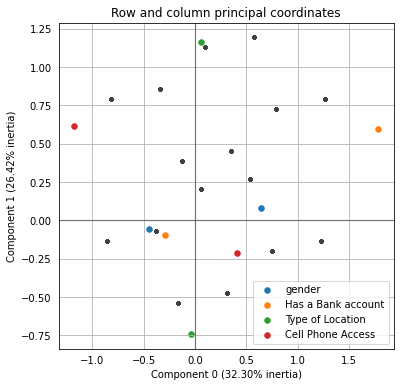

In [54]:
mca = prince.MCA(n_iter=3, copy=True, check_input=True, engine='auto', random_state=0)
mca = mca.fit(X)


x = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

## 2.Reccomendations.



Although the Survey carried out was comprehensive , it can beimproved by adding more open ended questions such as reasons why the Respondents do not have Bank Accounts.

This would allow the researcher to gain further insight into the respondents reasoning.


Furthermore the Survey should be extended to other countries in the Region to allow the researcher to compare the results and draw inference.